In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')
from quetzal.model import stepmodel
import pandas as pd

SQLalchemy is not installed. No support for SQL output.


In [2]:
training_folder = '../../'
plot_path = training_folder + 'outputs/plot/'

In [3]:
road = stepmodel.read_zip(training_folder + r'model/base/aon_pathfinder.zip')
distribution = stepmodel.read_zip(training_folder + r'model/base/distribution.zip')
sm = road.copy()
sm.volumes = distribution.volumes

read_hdf: 100%|██████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 86.98it/s]


In [4]:
# each link can have its own capacity
sm.road_links['capacity'] = 2000

# 'volume_car' is used for road pathfinder
sm.volumes['volume_car'] = sm.volumes['car_owner']
sm.road_links
constrained = sm.copy()
free = sm.copy()

In [5]:
constrained.step_road_pathfinder(maxiters=5, log=True, speedup=True, tolerance=0.01)

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:17<00:00,  6.24it/s]


step: 0  moved = 100.0 %
relgap = 0.0 %


100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:17<00:00,  6.17it/s]


step: 1  moved = 55.1 %
relgap = 13.2 %


100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:18<00:00,  5.96it/s]


step: 2  moved = 26.8 %
relgap = 1.2 %


100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.69it/s]


step: 3  moved = 7.6 %
relgap = 0.7 %


In [6]:
free.step_road_pathfinder(maxiters=1, log=True, speedup=False, tolerance=0.001)

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.62it/s]


step: 0  moved = 100.0 %
relgap = 0.0 %


In [7]:
constrained.to_zip(training_folder + 'model/transport/constrained_road_pathfinder.zip')

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 39/39 [00:05<00:00,  7.54it/s]


# PLOT

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.80it/s]


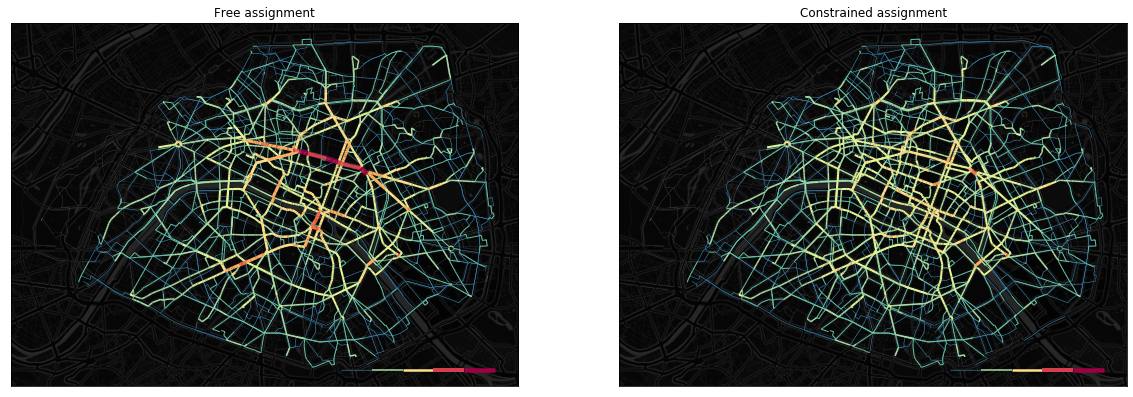

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=[20, 20])

axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

from syspy.syspy_utils import data_visualization as dv
bandwidth = dv.bandwidth
power=0.5
lv = [100, 1000, 2000, 5000, 7000]

url = 'http://a.basemaps.cartocdn.com/dark_nolabels/tileZ/tileX/tileY.png'
plot = bandwidth(
    free.road_links.loc[free.road_links['flow'] > 0], value='flow',
    power=0.5, figsize=[25, 15], scale=0.5, legend_values=lv, 
    label_kwargs={'color':'white', 'fontsize':16}, ax=axes[0]
)
dv.add_basemap(plot, url=url, zoom=12)
plot.set_title("Free assignment")

plot = bandwidth(
    constrained.road_links.loc[constrained.road_links['flow'] > 0], value='flow',
    power=0.5, figsize=[25, 15], scale=0.5, legend_values=lv, 
    label_kwargs={'color':'white', 'fontsize':16}, ax=axes[1]
)
dv.add_basemap(plot, url=url, zoom=12)
plot.set_title("Constrained assignment")
fig.tigh_layout=True

In [9]:
c = constrained.car_los.groupby(['origin', 'destination'])['actual_time'].min()

In [10]:
f = free.car_los.groupby(['origin', 'destination'])['actual_time'].min()

In [11]:
df = pd.DataFrame([c, f], index=['constrained', 'free']).T

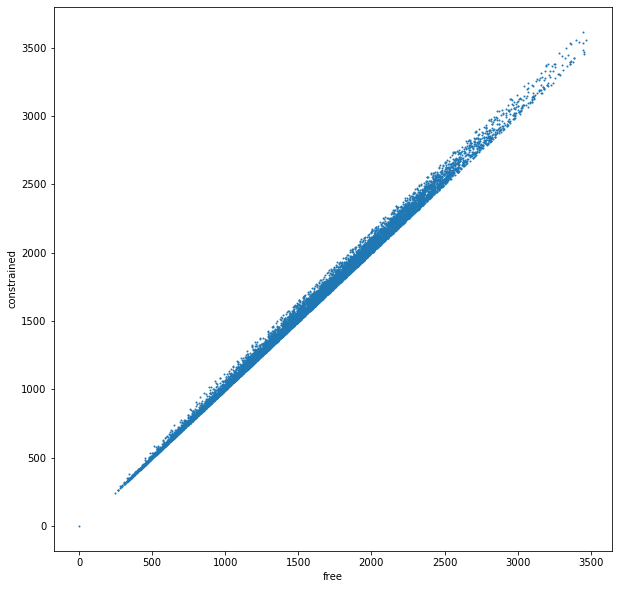

In [12]:
df.plot(kind='scatter', y='constrained', x='free', figsize=[10, 10], s=1)